# Introduction to Topic Modeling
## Day 1: The Basics&mdash;SOLUTIONS
---
---


## Outline
- [The Pandas dataframe: Children's literature](#data)
- [Text preprocessing: The Document-Term Matrix (DTM)](#preprocess)
- [Train a topic model using LDA](#train)
- [Document-by-topic distribution](#topics)
- [LDA as dimensionality reduction](#dimensionality)

## The Pandas dataframe: Children's literature <a id='data'></a>

In [1]:
import pandas as pd
import numpy as np
df_lit = pd.read_csv("../assets/childrens_lit.csv.bz2", 
                     sep='\t', 
                     index_col=0, 
                     encoding = 'utf-8', 
                     compression='bz2')

#drop rows where the text is missing.
df_lit = df_lit.dropna(subset=['text'])

#view the dataframe
df_lit

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
...,...,...,...,...
127,Up the River,Male,1881,UP THE RIVER OR YACHTING ON THE MISSISSIPPI ...
128,What Katy Did Next,Female,1886,WHAT KATY DID NEXT BY SUSAN COOLIDGE This...
129,Winning His Spurs,Male,1882,WINNING HIS SPURS ...
130,With Clive in India,Male,1884,"WITH CLIVE IN INDIA: Or, The Beginnings of an..."


## Text preprocessing: The Document-Term Matrix (DTM) <a id='preprocess'></a>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english')

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

Extracting tf features for LDA...
Done!


### Challenge

* Print out the 10 most _infrequent_ words (rather than the most frequent words). You can look at the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) for more information.
* Print the average number of times 10 most frequent and the 10 most infrequent words are used in a book.
* Print this out sorted from highest to lowest.

In [3]:
# solution 1
vocab = tf_vectorizer.get_feature_names_out() # save terms in vectorizer for later use 

# Convert sparse to long-format DTM (not memory-efficient)
long_dtm = pd.DataFrame(dtm.toarray(), 
                        columns=vocab, 
                        index=df_lit.index)

# Print least frequent words
long_dtm.sum().sort_values().head(10)

alteration    54
production    61
include       61
contract      63
calculate     64
sharing       68
assisting     68
cling         69
oblige        71
indicating    71
dtype: int64

In [4]:
# solution 2
print(long_dtm.mean().sort_values(ascending=False).head(10))
print()
print(long_dtm.mean().sort_values(ascending=True).head(10))

doctor     39.622047
dick       38.244094
king       35.354331
jack       29.818898
uncle      28.976378
tom        25.188976
ship       21.748031
project    21.559055
army       21.535433
french     21.078740
dtype: float64

alteration    0.425197
production    0.480315
include       0.480315
contract      0.496063
calculate     0.503937
sharing       0.535433
assisting     0.535433
cling         0.543307
oblige        0.559055
indicating    0.559055
dtype: float64


In [5]:
# solution 3
print(long_dtm.mean().sort_values(ascending=False).head(10))
print()
print(long_dtm.mean().sort_values(ascending=True).head(10).sort_values(ascending=False))

doctor     39.622047
dick       38.244094
king       35.354331
jack       29.818898
uncle      28.976378
tom        25.188976
ship       21.748031
project    21.559055
army       21.535433
french     21.078740
dtype: float64

indicating    0.559055
oblige        0.559055
cling         0.543307
assisting     0.535433
sharing       0.535433
calculate     0.503937
contract      0.496063
include       0.480315
production    0.480315
alteration    0.425197
dtype: float64


### Extra challenge

What are the most frequent words for male and female authors?

_Hints:_ First, join the long-format DTM with the main DataFrame (`pd.concat(axis=1)` works well for this). Then filter by gender. Once this is done, remove the columns from the original DF before you print frequent words.

In [6]:
# solution
# First, let's join the long-format DTM with the main DataFrame
df_w_dtm = pd.concat([df_lit, long_dtm.fillna(0)], axis=1)
df_w_dtm.head()

,title,author gender,year,text,000,10,20,30,50,_you_,...,yelling,yellow,yells,yer,yield,yielded,yonder,york,youngest,youth
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,0,1,0,1,0,7,...,1,1,2,0,0,5,1,23,1,14
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,0,2,4,1,1,0,...,1,0,2,2,0,0,0,0,0,2
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...,0,1,0,0,0,2,...,0,6,0,0,0,2,3,0,1,13
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...",0,0,1,0,0,3,...,1,2,0,0,1,4,0,0,7,13
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...",0,0,0,0,0,0,...,0,16,0,0,1,0,1,4,3,1


In [7]:
# then let's filter into separate DFs by author gender
male_author_dtm = df_w_dtm[df_w_dtm["author gender"]=="Male"]
female_author_dtm = df_w_dtm[df_w_dtm["author gender"]=="Female"]

male_author_dtm.head()

,title,author gender,year,text,000,10,20,30,50,_you_,...,yelling,yellow,yells,yer,yield,yielded,yonder,york,youngest,youth
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,0,1,0,1,0,7,...,1,1,2,0,0,5,1,23,1,14
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,0,2,4,1,1,0,...,1,0,2,2,0,0,0,0,0,2
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...,1,0,0,0,0,2,...,0,3,0,6,2,0,8,7,0,0
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...",0,0,0,0,0,0,...,0,4,1,0,0,0,2,0,0,1
10,Adventures in Australia,Male,1885,"ADVENTURES IN AUSTRALIA, BY W.H.G. KINGSTON. ...",0,0,0,0,0,0,...,1,1,1,0,4,0,1,0,1,1


In [8]:
# now let's remove the columns from the original DF so we can sort just by word columns from DTM
male_author_dtm.drop(columns = df_lit.columns, inplace = True)
female_author_dtm.drop(columns = df_lit.columns, inplace = True)

male_author_dtm.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,000,10,20,30,50,_you_,abandoned,ability,abode,abreast,...,yelling,yellow,yells,yer,yield,yielded,yonder,york,youngest,youth
0,0,1,0,1,0,7,0,0,1,0,...,1,1,2,0,0,5,1,23,1,14
1,0,2,4,1,1,0,2,1,2,2,...,1,0,2,2,0,0,0,0,0,2
8,1,0,0,0,0,2,1,2,0,0,...,0,3,0,6,2,0,8,7,0,0
9,0,0,0,0,0,0,1,0,0,1,...,0,4,1,0,0,0,2,0,0,1
10,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,4,0,1,0,1,1


In [9]:
# finally, let's look at top words for each of these gender-specific DFs
print("Most frequent words by male authors:")
print(male_author_dtm.sum().sort_values(ascending=False).head(10))
print()
print("Most frequent words by female authors:")
print(female_author_dtm.sum().sort_values(ascending=False).head(10))

Most frequent words by male authors:
dick      4562
doctor    4415
king      4333
jack      3708
uncle     3284
army      2699
ship      2673
tom       2648
camp      2622
french    2445
dtype: int64

Most frequent words by female authors:
girls     1319
mamma      985
papa       973
aunt       711
sister     686
baby       680
doctor     617
sweet      584
tom        551
flower     501
dtype: int64


## Train a topic model using LDA <a id='train'></a>

> **❗Important Note: Topic models are not perfectly reproducible, so you may see different topics, words, and/or probabilities  from what others see. This means my examples may not match up exactly with what you see when you run the notebook.**

In [10]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

    print()

### Challenge

Copy and paste the above code and fit a new model, `lda_new`, by changing some of the parameters. How does this change the output?

Suggestions:
1. Change the number of topics. 
2. Do not remove stop words. 
3. Change other options, either in the vectorize stage or the LDA model.

_Hint:_ If you change the text vectorization method, don't forget to re-define your vocabulary for the `print_top_words()` function with code like this:
```python
vocab = tf_vectorizer.get_feature_names_out()
```

In [11]:
# solution 1

n_samples = 2000
n_topics = 10
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda_new = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda_new.fit(dtm)
print("Done!")

print("\nTopics in LDA model:")
print_top_words(lda_new, vocab, n_top_words)

Fitting LDA model with tf features, n_samples=2000 and n_topics=10...
Done!

Topics in LDA model:

Topic #0:
project doctor girls papa sister mamma baby london street tom sweet dr tea aunt works remarked ain em foundation study office wasn cousin youth ladies presently darling flower public everybody loved george shop nurse ye ma class uncle stairs bell reader st regard doesn carriage agreement observed flowers demanded sisters

Topic #1:
dick uncle tom doctor fish jack em rope lads rock ay shock birds gun mate fishing beneath garden sand stream nay moments rocks eh excitedly thrust hook yer tremendous ashore ha pole ye softly fruit shore angrily growled ship gazing surface chap leg works deck ladder basket splash tail task

Topic #2:
king army french troops attack ship officers camp soldiers officer shore village city guns john boats regiment deck march tom vessel fort prince british rode advanced wounded james island native marched fleet ships france lads prisoners numbers band speed

In [12]:
# solution 2

# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None)
                                #stop_words='english')

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

vocab = tf_vectorizer.get_feature_names_out() # save terms in vectorizer for later use 

n_samples = 2000
n_topics = 10
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda_new = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda_new.fit(dtm)
print("Done!")

print("\nTopics in LDA model:")
print_top_words(lda_new, vocab, n_top_words)

Extracting tf features for LDA...
Done!
Fitting LDA model with tf features, n_samples=2000 and n_topics=10...
Done!

Topics in LDA model:

Topic #0:
dick uncle tom doctor fish jack em lads rope rock towards ay birds rocks gun beneath nay excitedly fishing stream moments thrust eh sand hook shock tremendous ha mate softly growled ashore stones angrily farther ship toward surface shore task leg works gazing horrible garden pole bird roar ye tail

Topic #1:
frank ain uncle dick em camp john tom pounds stream ship coast doctor dr project attack ye shore innocent mate nigh tent hunters street boats tea claim village cases cousin fort illustration wasn meat chap reckon rode towards public cabin king officer guilty london fever lads ice considerable afore de

Topic #2:
king john army city prince ship attack troops castle soldiers france french sword towards camp ships shore fought numbers prisoners vessel london rode band fleet march arrows village marched boats gate resistance officer vessel

In [13]:
# solution 3

# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.50, min_df=3,
                                max_features=None, 
                                stop_words='english')

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

vocab = tf_vectorizer.get_feature_names_out() # save terms in vectorizer for later use 

n_samples = 2000
n_topics = 10
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda_new = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda_new.fit(dtm)
print("Done!")

print("\nTopics in LDA model:")
print_top_words(lda_new, vocab, n_top_words)

Extracting tf features for LDA...
Done!
Fitting LDA model with tf features, n_samples=2000 and n_topics=10...
Done!

Topics in LDA model:

Topic #0:
romans walter percy roman titus simon major jews steamer jerusalem temple mary edward pierson ralph tug troops knight rome pilot archers commander knights leopard breaker martha geoffrey siege engine horatio followers galilee homer slain tiberias fort defenders towns defense france engineer leaders jew towers jewish inner tower cities palace assailants

Topic #1:
harry troops colonel frank regiment gutenberg tim project rupert cavalry malcolm ned natives fort tom charlie castle reginald sam fleet tm france infantry steamer walter column garrison earl duke sergeant governor indians spanish richard major hannibal alan siege william jim charles spaniards lieutenant artillery regiments irish troop pilot peter dick

Topic #2:
fred pa max primrose kenneth jasmine daisy samson poppy ma ta nat godfrey scar dove markham forrester colonel hannah chu

## Document-by-topic distribution <a id='topics'></a>

In [14]:
# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None, 
                                stop_words='english')

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

vocab = tf_vectorizer.get_feature_names_out() # save terms in vectorizer for later use 

n_samples = 2000
n_topics = 4
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda.fit(dtm)
print("Done!")

Extracting tf features for LDA...
Done!
Fitting LDA model with tf features, n_samples=2000 and n_topics=4...
Done!


In [15]:
# Get the topic distribution array
topic_dist = lda.transform(dtm)

# Merge back in with the original dataframe
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)

### Challenge

- What is the average topic weight by author gender, for each topic?
- Which topic is most represented in texts by women? Most represented in texts by men?
- Which topic is least represented in texts by women? Least represented in texts by men?
- Graph these results.

Hint 1: Consider using the python `range` function and a for-loop to create a list of topic indices and inspect average topic weights. This code block gets that started for you.

In [16]:
topic_columns = range(0,4)
for num in topic_columns:
    print(num)

0
1
2
3


Hint 2: Use a Pandas `groupby()` to compare the topic loadings of Male and Female authors.

In [17]:
#solution
grouped = df_w_topics.groupby("author gender")
for num in topic_columns:
    print(num)
    print(grouped[num].mean())

0
author gender
Female    0.653199
Male      0.323377
Name: 0, dtype: float64
1
author gender
Female    0.127721
Male      0.189827
Name: 1, dtype: float64
2
author gender
Female    0.157666
Male      0.326972
Name: 2, dtype: float64
3
author gender
Female    0.061414
Male      0.159824
Name: 3, dtype: float64


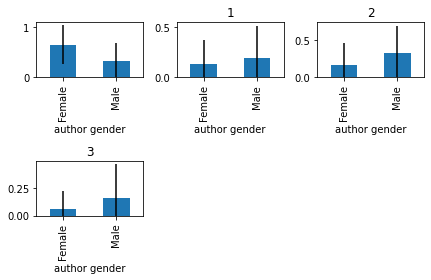

In [18]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
chrt = 0
for num in topic_columns:
    chrt += 1 
    ax = fig1.add_subplot(2,3, chrt)
    grouped[num].mean().plot(
        kind = 'bar', 
        yerr = grouped[num].std(), 
        ylim=0, ax=ax, title=num)

fig1.tight_layout()
plt.show()

## LDA as dimensionality reduction <a id='dimensionality'></a>

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import time
from scipy import spatial

dwm = df_w_topics.iloc[:,:4] # limit docs/topics DF to only topic weights

### Challenge

Calculate the cosine similarity between the first book and all other books. What is the most similar book to the first one?

_Hint 1:_ Use the `df.iterrows()` method to iterate over all rows in the document/topic weights DataFrame we just made. 

_Hint 2:_ To store the similarities, consider using a Python dictionary&mdashthat is, a list of key-value pairs. `max()` will get you the highest entry in the dictionary, and `dict.values()` will get you the dictionary values.

In [20]:
# solution

first_book = dwm.iloc[0,:] # separate out topic weights for first book

similarities = {} # initialize dictionary

print("Computing similarities...")
for book_idx, row in dwm.iloc[1:,].iterrows(): # loop over rows after first row, as we're comparing all books to first one
    sim = 1-spatial.distance.cosine(first_book, row)
    similarities[book_idx] = sim
    
print("Done!")

Computing similarities...
Done!


In [21]:
# Get similarity and index of most similar book
max_sim = max(similarities.values())
max_idx = max(similarities, key = similarities.get)

# Print the results
print("With a score of " + str(round(max_sim,5)) + ",")
print("the most similar book to '" + df_lit["title"].iloc[0] + "' is:")
print("'" + df_lit["title"].iloc[max_idx] + "'")

With a score of 0.99912,
the most similar book to 'A Dog with a Bad Name' is:
'A House Party, Don Gesualdo, and A Rainy June'
